In [567]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [568]:
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix

In [569]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [570]:
train_cpy=train.copy()
test_cpy=test.copy()

In [571]:
train.shape

(550068, 12)

In [572]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [573]:
train.Product_ID.nunique()

3631

In [574]:
train.User_ID.nunique()

5891

In [575]:
train_cat=train.select_dtypes(include='object')
train_cat.drop(['Product_ID'],axis=1,inplace=True)
train_cat.columns

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')

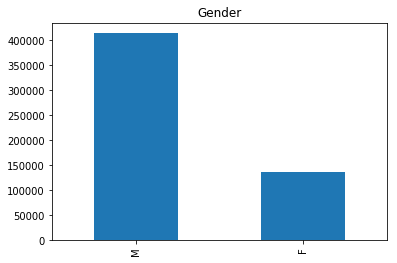

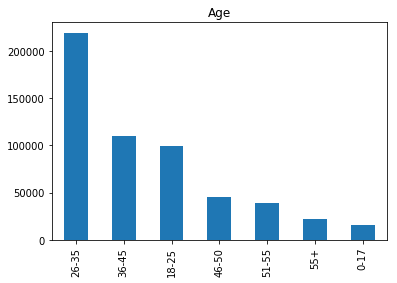

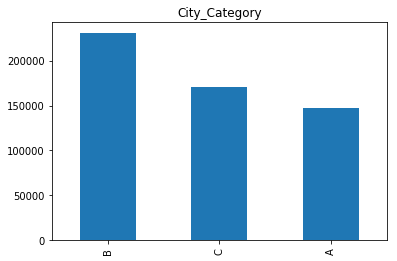

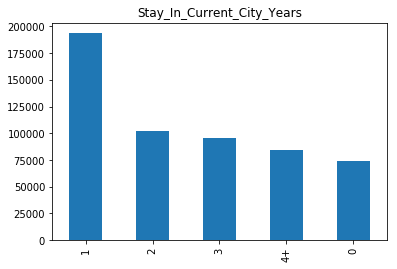

In [576]:
for i in train_cat.columns:
    train[i].value_counts().plot.bar()
    plt.title('{0}'.format(i))
    plt.show()

we can say higher number of males purchase.

Maximum buyers are in the age group 18-45.

City category B type has max buyers than C and least A.

The ones new in the city are heavy buyers.

In [577]:
train_numeric=train.select_dtypes(include=['int64','float64'])
train_numeric.drop(['User_ID'],axis=1,inplace=True)
train_numeric.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

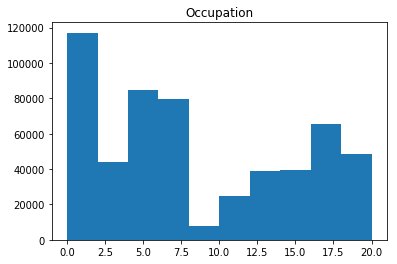

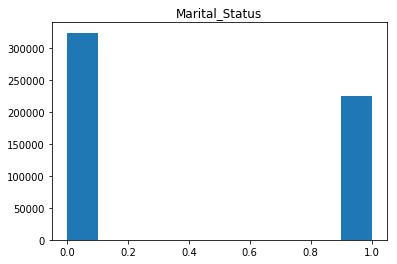

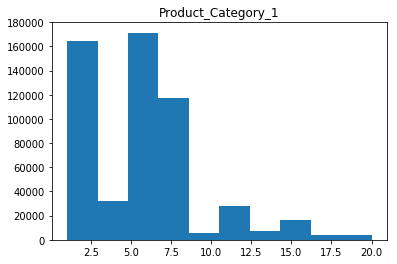

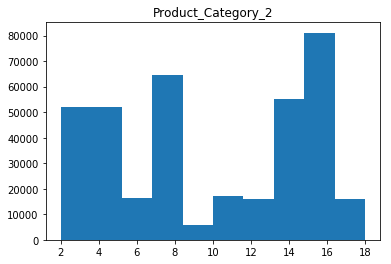

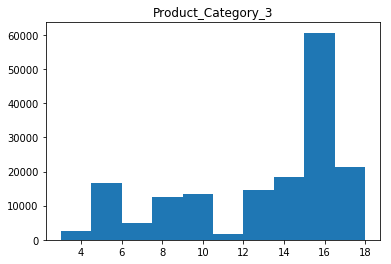

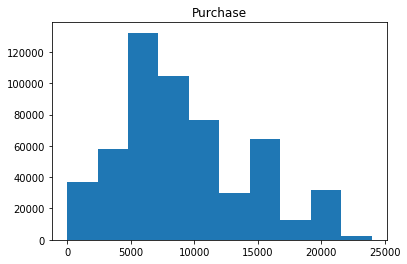

In [578]:
for i in train_numeric.columns:
    plt.hist(train[i])
    plt.title('{0}'.format(i))
    plt.show()

In [275]:
train_numeric.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


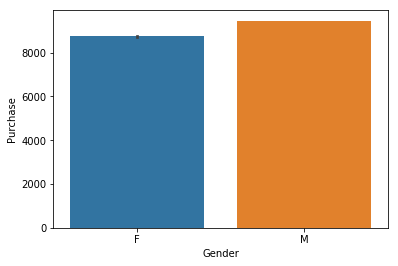

In [276]:
# bar plot with default statistic=mean
sns.barplot(x='Gender', y='Purchase', data=train)
plt.show()

# though majorly males shop but the purchase amount is quite close

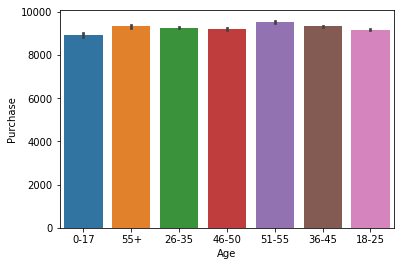

In [277]:
# bar plot with default statistic=mean
sns.barplot(x='Age', y='Purchase', data=train)
plt.show()

# purchase amount is same for almost all age groups

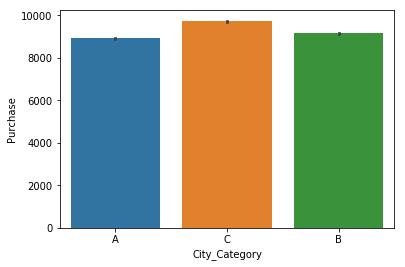

In [278]:
# bar plot with default statistic=mean
sns.barplot(x='City_Category', y='Purchase', data=train)
plt.show()

# purchase amount is higher for C

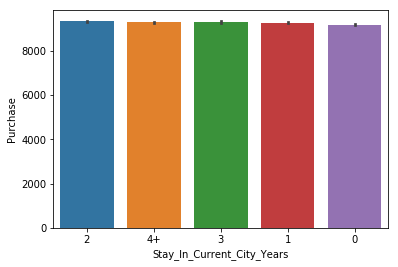

In [279]:
# bar plot with default statistic=mean
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=train)
plt.show()

# amount nearly same for all groups

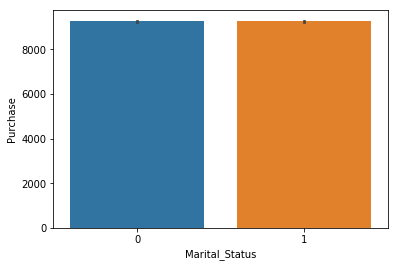

In [280]:
# bar plot with default statistic=mean
sns.barplot(x='Marital_Status', y='Purchase', data=train)
plt.show()

# amount nearly same for all groups

In [579]:
train["Product_Category_1_Count"] = train.groupby(['Product_Category_1'])['Product_Category_1'].transform('count')
pc1_count_dict = train.groupby(['Product_Category_1']).size().to_dict()
test['Product_Category_1_Count'] = test['Product_Category_1'].apply(lambda x:pc1_count_dict.get(x,0))

train["Product_Category_2_Count"] = train.groupby(['Product_Category_2'])['Product_Category_2'].transform('count')
pc2_count_dict = train.groupby(['Product_Category_2']).size().to_dict()
test['Product_Category_2_Count'] = test['Product_Category_2'].apply(lambda x:pc2_count_dict.get(x,0))

train["Product_Category_3_Count"] = train.groupby(['Product_Category_3'])['Product_Category_3'].transform('count')
pc3_count_dict = train.groupby(['Product_Category_3']).size().to_dict()
test['Product_Category_3_Count'] = test['Product_Category_3'].apply(lambda x:pc3_count_dict.get(x,0))

train["User_ID_Count"] = train.groupby(['User_ID'])['User_ID'].transform('count')
userID_count_dict = train.groupby(['User_ID']).size().to_dict()
test['User_ID_Count'] = test['User_ID'].apply(lambda x:userID_count_dict.get(x,0))

train["Product_ID_Count"] = train.groupby(['Product_ID'])['Product_ID'].transform('count')
productID_count_dict = train.groupby(['Product_ID']).size().to_dict()
test['Product_ID_Count'] = test['Product_ID'].apply(lambda x:productID_count_dict.get(x,0))

In [580]:
train["User_ID_MinPrice"] = train.groupby(['User_ID'])['Purchase'].transform('min')
userID_min_dict = train.groupby(['User_ID'])['Purchase'].min().to_dict()
test['User_ID_MinPrice'] = test['User_ID'].apply(lambda x:userID_min_dict.get(x,0))

train["User_ID_MaxPrice"] = train.groupby(['User_ID'])['Purchase'].transform('max')
userID_max_dict = train.groupby(['User_ID'])['Purchase'].max().to_dict()
test['User_ID_MaxPrice'] = test['User_ID'].apply(lambda x:userID_max_dict.get(x,0))

train["User_ID_MeanPrice"] = train.groupby(['User_ID'])['Purchase'].transform('mean')
userID_mean_dict = train.groupby(['User_ID'])['Purchase'].mean().to_dict()
test['User_ID_MeanPrice'] = test['User_ID'].apply(lambda x:userID_mean_dict.get(x,0))


train["Product_ID_MinPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('min')
productID_min_dict = train.groupby(['Product_ID'])['Purchase'].min().to_dict()
test['Product_ID_MinPrice'] = test['Product_ID'].apply(lambda x:productID_min_dict.get(x,0))

train["Product_ID_MaxPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('max')
productID_max_dict = train.groupby(['Product_ID'])['Purchase'].max().to_dict()
test['Product_ID_MaxPrice'] = test['Product_ID'].apply(lambda x:productID_max_dict.get(x,0))

train["Product_ID_MeanPrice"] = train.groupby(['Product_ID'])['Purchase'].transform('mean')
productID_mean_dict = train.groupby(['Product_ID'])['Purchase'].mean().to_dict()
test['Product_ID_MeanPrice'] = test['Product_ID'].apply(lambda x:productID_mean_dict.get(x,0))


In [581]:
userID_25p_dict = train.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['User_ID_25PercPrice'] = train['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))
test['User_ID_25PercPrice'] = test['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))

userID_75p_dict = train.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['User_ID_75PercPrice'] = train['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))
test['User_ID_75PercPrice'] = test['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))

productID_25p_dict = train.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
train['Product_ID_25PercPrice'] = train['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))
test['Product_ID_25PercPrice'] = test['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))

productID_75p_dict = train.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
train['Product_ID_75PercPrice'] = train['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))
test['Product_ID_75PercPrice'] = test['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))


In [582]:
round((train.isnull().sum()/len(train.index))*100,2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
Product_Category_1_Count       0.00
Product_Category_2_Count      31.57
Product_Category_3_Count      69.67
User_ID_Count                  0.00
Product_ID_Count               0.00
User_ID_MinPrice               0.00
User_ID_MaxPrice               0.00
User_ID_MeanPrice              0.00
Product_ID_MinPrice            0.00
Product_ID_MaxPrice            0.00
Product_ID_MeanPrice           0.00
User_ID_25PercPrice            0.00
User_ID_75PercPrice            0.00
Product_ID_25PercPrice         0.00
Product_ID_75PercPrice         0.00
dtype: float64

In [583]:
round((test.isnull().sum()/len(test.index))*100,2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            30.97
Product_Category_3            69.59
Product_Category_1_Count       0.00
Product_Category_2_Count       0.00
Product_Category_3_Count       0.00
User_ID_Count                  0.00
Product_ID_Count               0.00
User_ID_MinPrice               0.00
User_ID_MaxPrice               0.00
User_ID_MeanPrice              0.00
Product_ID_MinPrice            0.00
Product_ID_MaxPrice            0.00
Product_ID_MeanPrice           0.00
User_ID_25PercPrice            0.00
User_ID_75PercPrice            0.00
Product_ID_25PercPrice         0.00
Product_ID_75PercPrice         0.00
dtype: float64

In [584]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 27 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
Product_Category_1_Count      550068 non-null int64
Product_Category_2_Count      376430 non-null float64
Product_Category_3_Count      166821 non-null float64
User_ID_Count                 550068 non-null int64
Product_ID_Count              550068 non-nul

In [585]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train['Age']=le.fit_transform(train['Age'])
test['Age']=le.fit_transform(test['Age'])

train['City_Category']=le.fit_transform(train['City_Category'])
test['City_Category']=le.fit_transform(test['City_Category'])

train['Stay_In_Current_City_Years']=le.fit_transform(train['Stay_In_Current_City_Years'])
test['Stay_In_Current_City_Years']=le.fit_transform(test['Stay_In_Current_City_Years'])

# train['Gender']=train['Gender'].map({'M':1, 'F':0})
# test['Gender']=test['Gender'].map({'M':1, 'F':0})

In [586]:
pd.set_option('display.max_columns', 100)
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,User_ID_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,1000001,P00069042,F,0,10,0,2,0,3,NaN,NaN,8370,20213,NaN,NaN,35,227,612,19219,9545.514286,2648,13716,11870.863436,7884.50,12305.5,10804.00,13475.50
1,1000001,P00248942,F,0,10,0,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,35,581,612,19219,9545.514286,3880,19701,16304.030981,7884.50,12305.5,15312.00,19264.00
2,1000001,P00087842,F,0,10,0,2,0,12,NaN,NaN,1422,3947,NaN,NaN,35,102,612,19219,9545.514286,343,1776,1237.892157,7884.50,12305.5,1043.75,1423.75
3,1000001,P00085442,F,0,10,0,2,0,12,14.0,NaN,1057,3947,55108.0,NaN,35,341,612,19219,9545.514286,365,1778,1455.140762,7884.50,12305.5,1378.00,1736.00
4,1000002,P00285442,M,6,16,2,4,0,8,NaN,NaN,7969,113925,NaN,NaN,77,203,119,20657,10525.610390,3920,10073,7692.763547,7818.00,11973.0,6174.50,8082.50
5,1000003,P00193542,M,2,15,0,3,0,1,2.0,NaN,15227,140378,49217.0,NaN,29,615,3646,19631,11780.517241,3828,19698,14318.772358,6953.00,15592.0,11722.50,15821.00
6,1000004,P00184942,M,4,7,1,2,1,1,8.0,17.0,19215,140378,64088.0,16702.0,14,1440,481,19693,14747.714286,3809,19707,16899.227083,15488.50,19087.0,15421.25,19362.00
7,1000004,P00346142,M,4,7,1,2,1,1,15.0,NaN,15854,140378,37855.0,NaN,14,593,481,19693,14747.714286,3847,19698,14169.618887,15488.50,19087.0,11730.00,15837.00
8,1000004,P0097242,M,4,7,1,2,1,1,16.0,NaN,15686,140378,43255.0,NaN,14,912,481,19693,14747.714286,3936,19708,15947.346491,15488.50,19087.0,15263.25,19178.75
9,1000005,P00274942,M,2,20,0,1,1,8,NaN,NaN,7871,113925,NaN,NaN,106,793,1938,21021,7745.292453,1940,10082,8068.920555,4551.75,8823.0,7762.00,9844.00


In [587]:
train['Gender']=train['Gender'].map({'M':1, 'F':0})
test['Gender']=test['Gender'].map({'M':1, 'F':0})

In [588]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,User_ID_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370,20213,NaN,NaN,35,227,612,19219,9545.514286,2648,13716,11870.863436,7884.5,12305.5,10804.00,13475.50
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,35,581,612,19219,9545.514286,3880,19701,16304.030981,7884.5,12305.5,15312.00,19264.00
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422,3947,NaN,NaN,35,102,612,19219,9545.514286,343,1776,1237.892157,7884.5,12305.5,1043.75,1423.75
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057,3947,55108.0,NaN,35,341,612,19219,9545.514286,365,1778,1455.140762,7884.5,12305.5,1378.00,1736.00
4,1000002,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969,113925,NaN,NaN,77,203,119,20657,10525.610390,3920,10073,7692.763547,7818.0,11973.0,6174.50,8082.50


In [589]:
#filling missing values in product categories 2 & 3 by by any constant number say 0
train['Product_Category_2']=train['Product_Category_2'].fillna(0)
test['Product_Category_2']=test['Product_Category_2'].fillna(0)

train['Product_Category_3']=train['Product_Category_3'].fillna(0)
test['Product_Category_3']=test['Product_Category_3'].fillna(0)

train['Product_Category_2_Count']=train['Product_Category_2_Count'].fillna(0)
test['Product_Category_2_Count']=test['Product_Category_2_Count'].fillna(0)

train['Product_Category_3_Count']=train['Product_Category_3_Count'].fillna(0)
test['Product_Category_3_Count']=test['Product_Category_3_Count'].fillna(0)

In [590]:
round((test.isnull().sum()/len(test.index))*100,2)

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Product_Category_1_Count      0.0
Product_Category_2_Count      0.0
Product_Category_3_Count      0.0
User_ID_Count                 0.0
Product_ID_Count              0.0
User_ID_MinPrice              0.0
User_ID_MaxPrice              0.0
User_ID_MeanPrice             0.0
Product_ID_MinPrice           0.0
Product_ID_MaxPrice           0.0
Product_ID_MeanPrice          0.0
User_ID_25PercPrice           0.0
User_ID_75PercPrice           0.0
Product_ID_25PercPrice        0.0
Product_ID_75PercPrice        0.0
dtype: float64

In [591]:
train=train.drop(['User_ID','Product_ID'],axis=1)
test=test.drop(['User_ID','Product_ID'],axis=1)

In [592]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,User_ID_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,0,0,10,0,2,0,3,0.0,0.0,8370,20213,0.0,0.0,35,227,612,19219,9545.514286,2648,13716,11870.863436,7884.5,12305.5,10804.00,13475.50
1,0,0,10,0,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,35,581,612,19219,9545.514286,3880,19701,16304.030981,7884.5,12305.5,15312.00,19264.00
2,0,0,10,0,2,0,12,0.0,0.0,1422,3947,0.0,0.0,35,102,612,19219,9545.514286,343,1776,1237.892157,7884.5,12305.5,1043.75,1423.75
3,0,0,10,0,2,0,12,14.0,0.0,1057,3947,55108.0,0.0,35,341,612,19219,9545.514286,365,1778,1455.140762,7884.5,12305.5,1378.00,1736.00
4,1,6,16,2,4,0,8,0.0,0.0,7969,113925,0.0,0.0,77,203,119,20657,10525.610390,3920,10073,7692.763547,7818.0,11973.0,6174.50,8082.50


In [593]:
q1 = train['Purchase'].quantile(0.25)
q3 = train['Purchase'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
train = train[(train['Purchase'] > fence_low) & (train['Purchase'] < fence_high)]

In [411]:
# plt.figure(figsize=(20, 10))
# sns.pairplot(train)
# plt.show()

In [412]:
# from sklearn.model_selection import train_test_split
# df_train, df_test=train_test_split(train, train_size=0.7, test_size=0.3, random_state=100)

In [594]:
# #set seed for same results everytime
# seed=0
# import sklearn.ensemble as ensemble
# import sklearn.metrics as metrics

# X=df_train.drop('Purchase',1)
# y=df_train['Purchase']

# X_t=df_test.drop('Purchase',1)
# y_t=df_test['Purchase']
X=train.drop('Purchase',1)
y=train['Purchase']

# X_t=df_test.drop('Purchase',1)
# y_t=df_test['Purchase']
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =1)

# #declare the models

# rf=RandomForestClassifier()
# adb=ensemble.AdaBoostClassifier()
# bgc=ensemble.BaggingClassifier()
# gnb = GaussianNB()
# knn=KNeighborsClassifier()
# dt = DecisionTreeClassifier()
# bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

# # ,ab_rf,ab_dt,ab_nb,ab_lr,bgcl_lr

# models=[rf,adb,bgc,gnb,knn,dt,bgcl_lr]
# sctr,scte,auc,ps,rs,acc=[],[],[],[],[],[]
# def ens(X_train,X_test, y_train, y_test):
#     for model in models:
#             model.fit(X_train, y_train)
#             y_test_pred = model.predict(X_test)
#             y_test_pred_new=model.predict_proba(X_test)
#             y_test_pred_new=y_test_pred_new[:,1]
#             train_score=model.score(X_train,y_train)
#             test_score=model.score(X_test,y_test)
#             p_score=metrics.precision_score(y_test,y_test_pred)
#             r_score=metrics.recall_score(y_test,y_test_pred)
#             accr=metrics.accuracy_score(y_test,y_test_pred)
#             ac=metrics.roc_auc_score(y_test,y_test_pred_new)
            
#             sctr.append(train_score)
#             scte.append(test_score)
#             ps.append(p_score)
#             rs.append(r_score)
#             auc.append(ac)
#             acc.append(accr)
#     return sctr,scte,auc,ps,rs,acc

# ens(X_train,X_test, y_train, y_test)
# # 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
# ensemble=pd.DataFrame({'names':['Random Forest','Ada boost','Bagging',
#                                 'Naive-Bayes','KNN','Decistion Tree',
#                                 'bagged LR'],
#                        'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs,'accuracy':acc})
# ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
# ensemble

In [32]:
from sklearn.ensemble import RandomForestRegressor


In [146]:
# Create the parameter grid based on the results of random search 
param_grid = {
'max_depth': [10], 'max_features': [10], 'min_samples_leaf': [100], 
'min_samples_split': [200], 'n_estimators': [200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [147]:
# Fit the grid search to the data
grid_search.fit(X, y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  5.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [10], 'max_features': [10], 'min_samples_leaf': [100], 'min_samples_split': [200], 'n_estimators': [200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [396]:
# printing the optimal accuracy score and hyperparameters
# print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)
# We can get accuracy of 0.6598673565353703 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}

In [397]:
# # plotting accuracies with max_depth
# plt.figure()
# plt.plot(scores["param_max_depth"], 
#          scores["mean_train_score"], 
#          label="training accuracy")
# plt.plot(scores["param_max_depth"], 
#          scores["mean_test_score"], 
#          label="test accuracy")
# plt.xlabel("max_depth")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()


In [148]:
y_test_pred_rf=grid_search.predict(X_t)

In [150]:
from sklearn.metrics import mean_squared_error
mean_squared_error=mean_squared_error(y_t,y_test_pred_rf)
print("Final rmse value is =",np.sqrt(mean_squared_error))

Final rmse value is = 2934.221665005424


In [152]:
y_test_pred=grid_search.predict(test)

In [153]:
finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_pred,columns=['Purchase'])],1)
finalpred.to_csv("RF.csv",index=False)

### XGBOOST 

In [403]:
import xgboost as xgb 
from xgboost.sklearn import XGBRegressor

In [404]:
params = {}
params["eta"] = 0.03
params["min_child_weight"] = 10
params["subsample"] = 0.8
params["colsample_bytree"] = 0.7
params["max_depth"] = 10
params["seed"] = 0
plst = list(params.items())
num_rounds = 1100

In [405]:
xgb=XGBRegressor()

In [406]:
xgb.fit(X,y)
y_test_pred_xgb=xgb.predict(X_t)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Product_ID

In [407]:
from sklearn.metrics import mean_squared_error
mean_squared_error=mean_squared_error(y_t,y_test_pred_xgb)

In [319]:
print("Final rmse value is =",np.sqrt(mean_squared_error))

Final rmse value is = 2422.3768401174416


In [320]:
y_test_pred_x=xgb.predict(test)

In [321]:
finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_pred_x,columns=['Purchase'])],1)
finalpred.to_csv("xgb.csv",index=False)

### Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()


In [88]:
dt.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [89]:
y_test_pred_dt=dt.predict(X_t)

In [91]:
from sklearn.metrics import mean_squared_error
mean_squared_error=mean_squared_error(y_t,y_test_pred_dt)
print("Final rmse value is =",np.sqrt(mean_squared_error))

Final rmse value is = 3505.2541793983273


In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [105]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed: 30.5min finished


[14:22:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
0.6880324969190342
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [129]:
params={'colsample_bytree': [0.7], 'learning_rate': [0.0005], 'max_depth': [9], 'min_child_weight': [4],
        'n_estimators': [100],'objective': ['reg:linear'], 'subsample': [0.7]}

In [130]:
xgb_grid = GridSearchCV(xgb1,
                        params,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X,y)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of   2 | elapsed:  1.1min finished


[16:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.0005], 'max_depth': [9], 'min_child_weight': [4], 'n_estimators': [100], 'objective': ['reg:linear'], 'subsample': [0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [131]:
y_test_pred_xgb1=xgb.predict(X_t)

In [132]:
from sklearn.metrics import mean_squared_error
mean_squared_error=mean_squared_error(y_t,y_test_pred_xgb1)
print("Final rmse value is =",np.sqrt(mean_squared_error))

Final rmse value is = 2823.3864772111156


### Light GBM

In [452]:
import lightgbm as lgb

In [399]:
lgbm=lgb.LGBMRegressor()

In [400]:
# params={'colsample_bytree': [0.7], 'learning_rate': [0.07], 'max_depth': [15], 'min_child_weight': [4],
#         'n_estimators': [100], 'subsample': [0.5]}

params={'num_leaves':[200], 'objective':['regression'],'max_depth':[15],'learning_rate':[.1],'max_bin':[200]}

In [401]:
model = GridSearchCV(lgbm,
                        params,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)



In [402]:
model.fit(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: Product_ID

In [ ]:
y_test_pred_lgbm=model.predict(X_t)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error=mean_squared_error(y_t,y_test_pred_lgbm)
print("Final rmse value is =",np.sqrt(mean_squared_error))

In [ ]:
y_test_pred_l=model.predict(test)

In [ ]:
finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_pred_l,columns=['Purchase'])],1)
finalpred.to_csv("lgbm.csv",index=False)

### Catboost

In [322]:
import catboost as cb

In [323]:
model=cb.CatBoostRegressor()

In [324]:
grid = {'learning_rate': [0.1],
        'depth': [10],
        'l2_leaf_reg': [15]}

model = GridSearchCV(model,
                        grid,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

In [325]:
model.fit(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed: 24.2min finished


0:	learn: 4590.5242303	total: 717ms	remaining: 11m 55s
1:	learn: 4286.7583727	total: 1.23s	remaining: 10m 13s
2:	learn: 4022.2523141	total: 1.73s	remaining: 9m 33s
3:	learn: 3791.2315266	total: 2.2s	remaining: 9m 8s
4:	learn: 3593.2550505	total: 2.61s	remaining: 8m 39s
5:	learn: 3421.1867933	total: 3.02s	remaining: 8m 20s
6:	learn: 3275.1962150	total: 3.45s	remaining: 8m 9s
7:	learn: 3149.3479598	total: 3.86s	remaining: 7m 58s
8:	learn: 3043.9582559	total: 4.88s	remaining: 8m 57s
9:	learn: 2954.4201329	total: 6.02s	remaining: 9m 56s
10:	learn: 2880.2943576	total: 6.7s	remaining: 10m 2s
11:	learn: 2816.8295060	total: 7.11s	remaining: 9m 45s
12:	learn: 2763.5420810	total: 7.51s	remaining: 9m 30s
13:	learn: 2719.6914944	total: 7.95s	remaining: 9m 19s
14:	learn: 2682.3965049	total: 8.36s	remaining: 9m 8s
15:	learn: 2651.6734586	total: 8.77s	remaining: 8m 59s
16:	learn: 2625.2561489	total: 9.2s	remaining: 8m 51s
17:	learn: 2603.4108634	total: 9.61s	remaining: 8m 44s
18:	learn: 2585.0717044	

149:	learn: 2399.7838174	total: 1m 29s	remaining: 8m 28s
150:	learn: 2399.2972099	total: 1m 30s	remaining: 8m 29s
151:	learn: 2398.6171954	total: 1m 31s	remaining: 8m 27s
152:	learn: 2398.0947048	total: 1m 31s	remaining: 8m 26s
153:	learn: 2397.3166164	total: 1m 31s	remaining: 8m 24s
154:	learn: 2396.9827018	total: 1m 32s	remaining: 8m 22s
155:	learn: 2396.5905418	total: 1m 32s	remaining: 8m 21s
156:	learn: 2395.8497584	total: 1m 33s	remaining: 8m 20s
157:	learn: 2395.5867682	total: 1m 33s	remaining: 8m 18s
158:	learn: 2395.0355321	total: 1m 34s	remaining: 8m 18s
159:	learn: 2394.4204229	total: 1m 35s	remaining: 8m 21s
160:	learn: 2394.0044214	total: 1m 36s	remaining: 8m 23s
161:	learn: 2393.4779345	total: 1m 37s	remaining: 8m 22s
162:	learn: 2393.0412110	total: 1m 37s	remaining: 8m 21s
163:	learn: 2392.4096724	total: 1m 38s	remaining: 8m 19s
164:	learn: 2391.9983170	total: 1m 38s	remaining: 8m 18s
165:	learn: 2391.7577461	total: 1m 38s	remaining: 8m 17s
166:	learn: 2391.4789895	total:

294:	learn: 2338.5632137	total: 2m 58s	remaining: 7m 6s
295:	learn: 2338.1312664	total: 2m 58s	remaining: 7m 5s
296:	learn: 2337.8104898	total: 2m 59s	remaining: 7m 4s
297:	learn: 2337.4964657	total: 2m 59s	remaining: 7m 3s
298:	learn: 2337.3286704	total: 3m	remaining: 7m 2s
299:	learn: 2336.7897058	total: 3m 1s	remaining: 7m 3s
300:	learn: 2336.3756877	total: 3m 2s	remaining: 7m 3s
301:	learn: 2335.9049718	total: 3m 2s	remaining: 7m 2s
302:	learn: 2335.2827809	total: 3m 3s	remaining: 7m 1s
303:	learn: 2335.1126842	total: 3m 3s	remaining: 7m
304:	learn: 2334.9241388	total: 3m 4s	remaining: 6m 59s
305:	learn: 2334.6749601	total: 3m 4s	remaining: 6m 58s
306:	learn: 2334.4632347	total: 3m 4s	remaining: 6m 57s
307:	learn: 2333.9389117	total: 3m 5s	remaining: 6m 56s
308:	learn: 2333.4560722	total: 3m 5s	remaining: 6m 55s
309:	learn: 2333.2391823	total: 3m 6s	remaining: 6m 55s
310:	learn: 2332.8359032	total: 3m 7s	remaining: 6m 56s
311:	learn: 2332.3110900	total: 3m 8s	remaining: 6m 56s
312:

440:	learn: 2289.3621707	total: 4m 24s	remaining: 5m 35s
441:	learn: 2289.1891888	total: 4m 24s	remaining: 5m 34s
442:	learn: 2288.8518490	total: 4m 25s	remaining: 5m 33s
443:	learn: 2288.4707376	total: 4m 25s	remaining: 5m 32s
444:	learn: 2288.1947509	total: 4m 25s	remaining: 5m 31s
445:	learn: 2287.9287857	total: 4m 26s	remaining: 5m 30s
446:	learn: 2287.4502412	total: 4m 27s	remaining: 5m 31s
447:	learn: 2287.2464588	total: 4m 28s	remaining: 5m 31s
448:	learn: 2287.1284285	total: 4m 29s	remaining: 5m 30s
449:	learn: 2286.8688265	total: 4m 30s	remaining: 5m 30s
450:	learn: 2286.4595890	total: 4m 30s	remaining: 5m 29s
451:	learn: 2286.1645899	total: 4m 31s	remaining: 5m 28s
452:	learn: 2285.8732605	total: 4m 31s	remaining: 5m 28s
453:	learn: 2285.7393514	total: 4m 32s	remaining: 5m 27s
454:	learn: 2285.4821128	total: 4m 32s	remaining: 5m 26s
455:	learn: 2285.2295353	total: 4m 33s	remaining: 5m 25s
456:	learn: 2285.0238243	total: 4m 33s	remaining: 5m 24s
457:	learn: 2284.7342785	total:

585:	learn: 2247.1854045	total: 5m 50s	remaining: 4m 7s
586:	learn: 2246.9216055	total: 5m 50s	remaining: 4m 6s
587:	learn: 2246.6541884	total: 5m 51s	remaining: 4m 6s
588:	learn: 2246.5905876	total: 5m 51s	remaining: 4m 5s
589:	learn: 2246.2661473	total: 5m 52s	remaining: 4m 4s
590:	learn: 2245.9068772	total: 5m 52s	remaining: 4m 4s
591:	learn: 2245.6877899	total: 5m 53s	remaining: 4m 3s
592:	learn: 2245.5549933	total: 5m 53s	remaining: 4m 2s
593:	learn: 2245.4388337	total: 5m 54s	remaining: 4m 2s
594:	learn: 2245.1367642	total: 5m 55s	remaining: 4m 2s
595:	learn: 2244.8862965	total: 5m 56s	remaining: 4m 1s
596:	learn: 2244.7043035	total: 5m 56s	remaining: 4m
597:	learn: 2244.5675124	total: 5m 57s	remaining: 4m
598:	learn: 2244.3513532	total: 5m 57s	remaining: 3m 59s
599:	learn: 2244.0692933	total: 5m 58s	remaining: 3m 58s
600:	learn: 2243.9044051	total: 5m 58s	remaining: 3m 58s
601:	learn: 2243.4535671	total: 5m 59s	remaining: 3m 57s
602:	learn: 2243.3769518	total: 5m 59s	remaining: 

731:	learn: 2210.1656982	total: 7m 15s	remaining: 2m 39s
732:	learn: 2209.9138332	total: 7m 16s	remaining: 2m 38s
733:	learn: 2209.6859429	total: 7m 16s	remaining: 2m 38s
734:	learn: 2209.3733201	total: 7m 17s	remaining: 2m 37s
735:	learn: 2209.3129850	total: 7m 17s	remaining: 2m 37s
736:	learn: 2209.0584769	total: 7m 18s	remaining: 2m 36s
737:	learn: 2208.7798669	total: 7m 18s	remaining: 2m 35s
738:	learn: 2208.5282593	total: 7m 19s	remaining: 2m 35s
739:	learn: 2208.2168421	total: 7m 19s	remaining: 2m 34s
740:	learn: 2207.9568142	total: 7m 20s	remaining: 2m 33s
741:	learn: 2207.5776067	total: 7m 20s	remaining: 2m 33s
742:	learn: 2207.2051762	total: 7m 22s	remaining: 2m 32s
743:	learn: 2207.0157535	total: 7m 23s	remaining: 2m 32s
744:	learn: 2206.7475365	total: 7m 23s	remaining: 2m 31s
745:	learn: 2206.3414572	total: 7m 23s	remaining: 2m 31s
746:	learn: 2206.1657192	total: 7m 24s	remaining: 2m 30s
747:	learn: 2205.9223865	total: 7m 25s	remaining: 2m 29s
748:	learn: 2205.7779981	total:

876:	learn: 2178.9748031	total: 8m 39s	remaining: 1m 12s
877:	learn: 2178.7085266	total: 8m 40s	remaining: 1m 12s
878:	learn: 2178.4960482	total: 8m 40s	remaining: 1m 11s
879:	learn: 2178.2404869	total: 8m 41s	remaining: 1m 11s
880:	learn: 2178.1664615	total: 8m 41s	remaining: 1m 10s
881:	learn: 2177.9520739	total: 8m 41s	remaining: 1m 9s
882:	learn: 2177.6649035	total: 8m 42s	remaining: 1m 9s
883:	learn: 2177.4811140	total: 8m 42s	remaining: 1m 8s
884:	learn: 2177.3208212	total: 8m 43s	remaining: 1m 7s
885:	learn: 2177.1602536	total: 8m 43s	remaining: 1m 7s
886:	learn: 2177.0700568	total: 8m 44s	remaining: 1m 6s
887:	learn: 2176.9106935	total: 8m 45s	remaining: 1m 6s
888:	learn: 2176.5921455	total: 8m 46s	remaining: 1m 5s
889:	learn: 2176.4600385	total: 8m 47s	remaining: 1m 5s
890:	learn: 2176.1454608	total: 8m 47s	remaining: 1m 4s
891:	learn: 2176.0106953	total: 8m 48s	remaining: 1m 3s
892:	learn: 2175.6673941	total: 8m 48s	remaining: 1m 3s
893:	learn: 2175.4186222	total: 8m 49s	rema

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=<catboost.core.CatBoostRegressor object at 0x0000000019126630>,
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'learning_rate': [0.1], 'depth': [10], 'l2_leaf_reg': [15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [326]:
y_test=model.predict(X_t)

In [327]:
# print(model.get_best_score())
# print(model.get_feature_importance())

In [328]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_t,y_test)
print('Root Mean Square Value: ',np.sqrt(mse))

Root Mean Square Value:  2391.629593327453


In [329]:
y_test_predict_c=model.predict(test)

In [330]:
finalpred=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(y_test_predict_c,columns=['Purchase'])],1)
finalpred.to_csv("catb.csv",index=False)

In [331]:
### Elastic Net

In [332]:
from sklearn.linear_model import ElasticNet

regressor = ElasticNet(alpha = 0.05)
regressor.fit(X, y)
y_pred = regressor.predict(X_t)

from sklearn.metrics import mean_squared_error
# finding the mean_squared error
mse = mean_squared_error(y_t, y_pred)
print("RMSE Error:", np.sqrt(mse))



RMSE Error: 2542.314647201709




Creating 2 LightBoost Models both with different learning rates and different set of features for both of them

   Light Boost model 1 (learning rate = 0.5), and features set = alist + blist (mentioned below)
   
   Light Boost model 2 (learinng rate = 0.8), and features set = alist + clist** (mentioned below)



In [665]:
alist = ['Gender',
'Age',
'Occupation',
'City_Category',
'Stay_In_Current_City_Years',
'Marital_Status',
'Product_Category_1',
'Product_Category_2',
'Product_Category_3',
'User_ID_Count',
'Product_ID_Count']
         
blist = ['User_ID_MinPrice',
'User_ID_MaxPrice',
'User_ID_MeanPrice',
'Product_ID_MinPrice',
'Product_ID_MaxPrice',
'Product_ID_MeanPrice']

clist = ['User_ID_25PercPrice',
'User_ID_75PercPrice',
'Product_ID_25PercPrice',
'Product_ID_75PercPrice',
'Product_Category_1_Count',
'Product_Category_2_Count',
'Product_Category_3_Count',]


In [666]:
#XGB model 1 dataframe
train1 = train[alist+blist]
test1 = test[alist+blist]

#XGB model 2 dataframe 
train2 = train[alist+clist]
test2 = test[alist+clist]

In [667]:
# train1_x=train1.drop(['Purchase'],axis=1)
# train_1_y=train1['Purchase']

In [723]:
mod_1=lgb.LGBMRegressor(learning_rate=[.2],importance_type='gain')
mod_2=lgb.LGBMRegressor(learning_rate=[.4],importance_type='gain')

In [702]:
X_train,X_test,Y_train,Y_test = train_test_split(train1,y,test_size=0.2,random_state=42)

In [703]:
# params={'num_leaves':[200], 'objective':['regression'],'max_depth':[15],'learning_rate':[.5],'max_bin':[200]}

In [704]:
# mod_1 = GridSearchCV(lgbm_mod1,
#                         params,
#                         cv = 3,
#                         n_jobs = 5,
#                         verbose=True)


In [705]:
mod_1.fit(X_train,Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='gain', learning_rate=[0.2], max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [706]:
y_test=mod_1.predict(X_test)

In [707]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,y_test)
print('Root Mean Square Value: ',np.sqrt(mse))

Root Mean Square Value:  2453.1635354670116


In [708]:
# feature_important 

feature_important = pd.DataFrame({'Features':X_train.columns,'Importance':mod_1.feature_importances_})

keys = list(X_train.columns)
values = list(mod_1.feature_importances_)
total = sum(values)
new = [value * 100. / total for value in values]
new = np.round(new,2)

feature_importances = pd.DataFrame()
feature_importances['Features'] = keys
feature_importances['Importance (%)'] = new


feature_importances = feature_importances.sort_values(['Importance (%)'],ascending=False).reset_index(drop=True)
feature_importances
feature_importances.style.set_properties(**{'font-size':'10pt'})

,Features,Importance (%)
0,Product_ID_MeanPrice,93.9
1,User_ID_MeanPrice,3.69
2,User_ID_Count,0.57
3,User_ID_MaxPrice,0.54
4,Product_ID_MaxPrice,0.3
5,User_ID_MinPrice,0.21
6,Product_ID_MinPrice,0.12
7,Age,0.11
8,Gender,0.11
9,Product_ID_Count,0.1


Text(0, 0.5, 'Features')

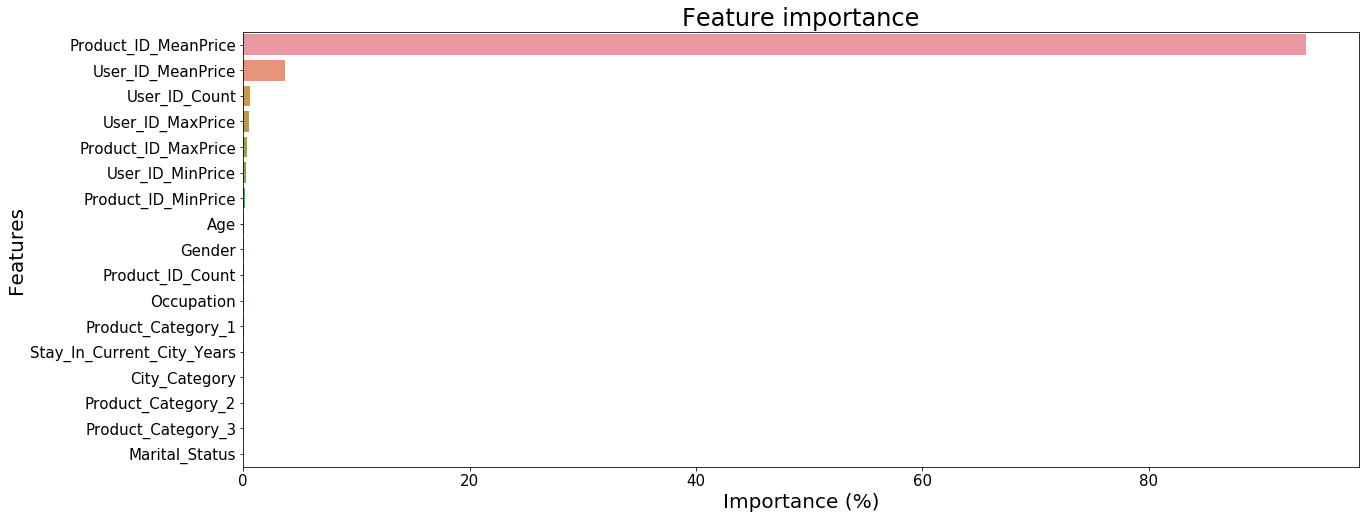

In [709]:
plt.figure(figsize=(20, 8))
sns.barplot(data=feature_importances, x='Importance (%)', y='Features');
plt.title('Feature importance',fontsize=24)
plt.xlabel('Importance (%)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Features',fontsize=20)

In [710]:
#prediction1
pred_lgbm_m1 = mod_1.predict(test1)
sub=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(pred_lgbm_m1,columns=['Purchase'])],1)
sub.to_csv('lgbm_mod1.csv',index=False)

In [733]:
X_train,X_test,Y_train,Y_test = train_test_split(train2,y,test_size=0.2,random_state=42)

In [734]:
mod_2.fit(X_train,Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='gain', learning_rate=[0.3], max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [735]:
y_test=mod_2.predict(X_test)

In [736]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,y_test)
print('Root Mean Square Value: ',np.sqrt(mse))

Root Mean Square Value:  2456.1426502437566


In [737]:
# feature_important 

feature_important = pd.DataFrame({'Features':X_train.columns,'Importance':mod_2.feature_importances_})

keys = list(X_train.columns)
values = list(mod_2.feature_importances_)
total = sum(values)
new = [value * 100. / total for value in values]
new = np.round(new,2)

feature_importances = pd.DataFrame()
feature_importances['Features'] = keys
feature_importances['Importance (%)'] = new


feature_importances = feature_importances.sort_values(['Importance (%)'],ascending=False).reset_index(drop=True)
feature_importances
feature_importances.style.set_properties(**{'font-size':'10pt'})

,Features,Importance (%)
0,Product_ID_75PercPrice,77.45
1,Product_ID_25PercPrice,16.2
2,User_ID_75PercPrice,2.53
3,User_ID_25PercPrice,2.22
4,User_ID_Count,0.54
5,Product_Category_1,0.18
6,Product_ID_Count,0.18
7,Age,0.14
8,Occupation,0.12
9,Gender,0.09


Text(0, 0.5, 'Features')

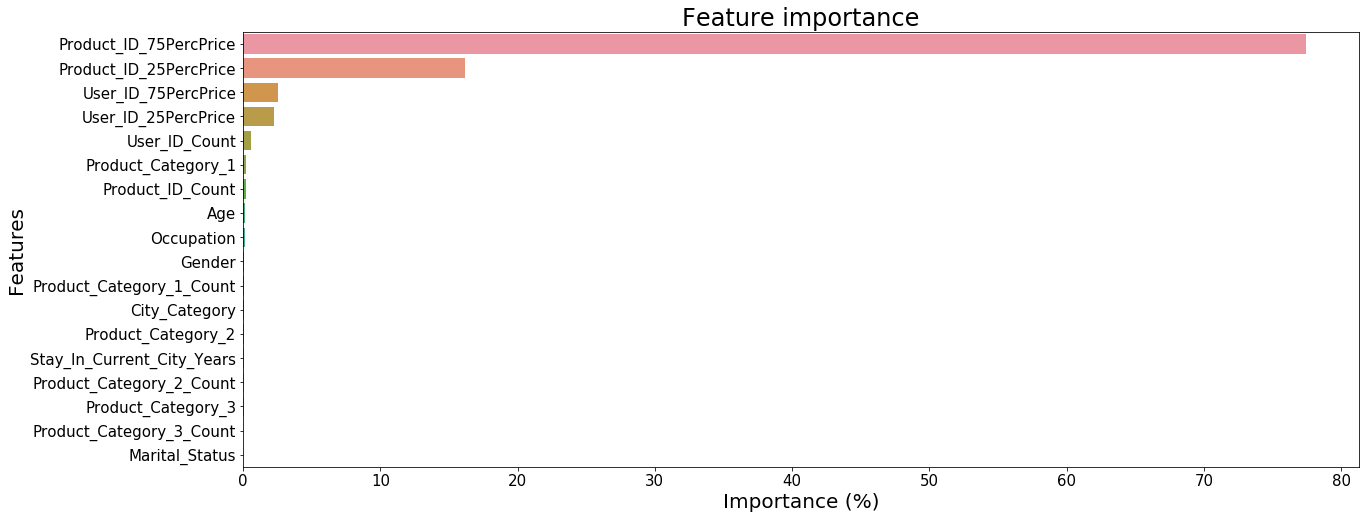

In [738]:
plt.figure(figsize=(20, 8))
sns.barplot(data=feature_importances, x='Importance (%)', y='Features');
plt.title('Feature importance',fontsize=24)
plt.xlabel('Importance (%)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Features',fontsize=20)

In [739]:
#prediction2
pred_lgbm_m2 = mod_2.predict(test2)
sub=pd.concat([test_cpy['User_ID'],test_cpy['Product_ID'],pd.DataFrame(pred_lgbm_m2,columns=['Purchase'])],1)
sub.to_csv('lgbm_mod2.csv',index=False)

In [740]:
## Weighted average of above two models

In [741]:
sub['Purchase'] = 0.5*pred_lgbm_m1 + 0.5*pred_lgbm_m2
sub.to_csv('final.csv',index=False)